In [12]:
!pip install tensorflow

Epoch 1/120
1/1 [==============================] - 1s 813ms/step - loss: 0.6934
Epoch 2/120
1/1 [==============================] - 0s 5ms/step - loss: 0.6916
Epoch 3/120
1/1 [==============================] - 0s 9ms/step - loss: 0.6894
Epoch 4/120
1/1 [==============================] - 0s 7ms/step - loss: 0.6856
Epoch 5/120
1/1 [==============================] - 0s 8ms/step - loss: 0.6797
Epoch 6/120
1/1 [==============================] - 0s 7ms/step - loss: 0.6711
Epoch 7/120
1/1 [==============================] - 0s 7ms/step - loss: 0.6592
Epoch 8/120
1/1 [==============================] - 0s 10ms/step - loss: 0.6432
Epoch 9/120
1/1 [==============================] - 0s 8ms/step - loss: 0.6232
Epoch 10/120
1/1 [==============================] - 0s 7ms/step - loss: 0.5996
Epoch 11/120
1/1 [==============================] - 0s 8ms/step - loss: 0.5751
Epoch 12/120
1/1 [==============================] - 0s 7ms/step - loss: 0.5546
Epoch 13/120
1/1 [==============================] - 0s 9ms

1/1 [==============================] - 0s 8ms/step - loss: 0.4578
Epoch 105/120
1/1 [==============================] - 0s 10ms/step - loss: 0.4570
Epoch 106/120
1/1 [==============================] - 0s 9ms/step - loss: 0.4564
Epoch 107/120
1/1 [==============================] - 0s 6ms/step - loss: 0.4557
Epoch 108/120
1/1 [==============================] - 0s 7ms/step - loss: 0.4551
Epoch 109/120
1/1 [==============================] - 0s 9ms/step - loss: 0.4546
Epoch 110/120
1/1 [==============================] - 0s 7ms/step - loss: 0.4541
Epoch 111/120
1/1 [==============================] - 0s 7ms/step - loss: 0.4537
Epoch 112/120
1/1 [==============================] - 0s 7ms/step - loss: 0.4533
Epoch 113/120
1/1 [==============================] - 0s 12ms/step - loss: 0.4530
Epoch 114/120
1/1 [==============================] - 0s 8ms/step - loss: 0.4528
Epoch 115/120
1/1 [==============================] - 0s 7ms/step - loss: 0.4525
Epoch 116/120
1/1 [==============================] -

1/1 [==============================] - 0s 8ms/step - loss: 0.4803
Epoch 75/120
1/1 [==============================] - 0s 9ms/step - loss: 0.4794
Epoch 76/120
1/1 [==============================] - 0s 8ms/step - loss: 0.4783
Epoch 77/120
1/1 [==============================] - 0s 8ms/step - loss: 0.4773
Epoch 78/120
1/1 [==============================] - 0s 10ms/step - loss: 0.4761
Epoch 79/120
1/1 [==============================] - 0s 7ms/step - loss: 0.4747
Epoch 80/120
1/1 [==============================] - 0s 8ms/step - loss: 0.4733
Epoch 81/120
1/1 [==============================] - 0s 8ms/step - loss: 0.4717
Epoch 82/120
1/1 [==============================] - 0s 9ms/step - loss: 0.4701
Epoch 83/120
1/1 [==============================] - 0s 7ms/step - loss: 0.4684
Epoch 84/120
1/1 [==============================] - 0s 6ms/step - loss: 0.4667
Epoch 85/120
1/1 [==============================] - 0s 9ms/step - loss: 0.4650
Epoch 86/120
1/1 [==============================] - 0s 8ms/step 

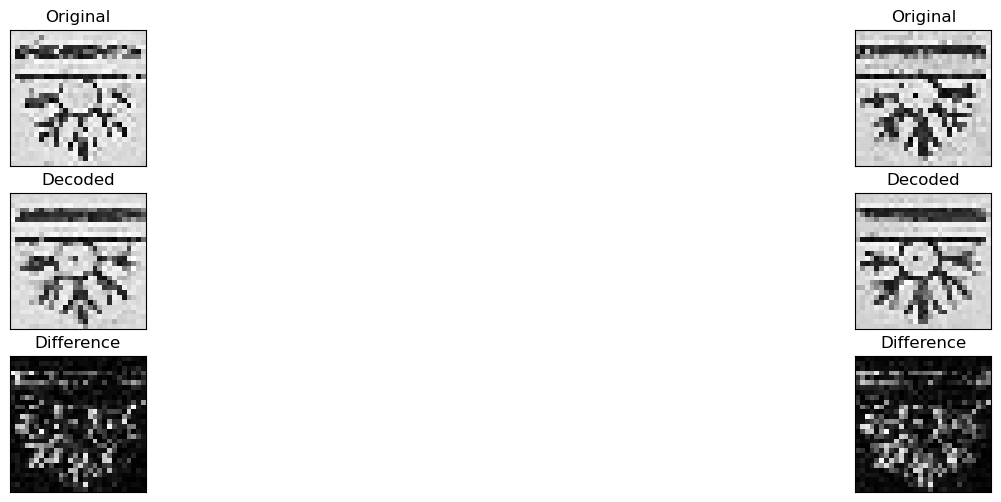

In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, Layer
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Spatial Transformer Layer
class SpatialTransformer(Layer):
    def __init__(self, **kwargs):
        super(SpatialTransformer, self).__init__(**kwargs)
        self.localization_net = tf.keras.Sequential([
            Conv2D(8, kernel_size=7, activation='relu'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(50, activation='relu')
        ])

    def call(self, X):
        theta = self.localization_net(X)
        # Placeholder for transformation - replace with actual transformation
        return theta

# Build Autoencoder with STN
def build_autoencoder_with_stn(input_shape=(28, 28, 1)):
    inputs = Input(shape=input_shape)
    transformed = SpatialTransformer()(inputs)
    
    # Flatten the output from STN for the dense layers
    x = Flatten()(transformed)
    
    # Encoder
    encoded = Dense(128, activation='relu')(x)
    encoded = Dense(64, activation='relu')(encoded)
    
    # Decoder
    decoded = Dense(128, activation='relu')(encoded)
    decoded = Dense(np.prod(input_shape), activation='sigmoid')(decoded)
    
    # Reshape back to the original image shape
    decoded = Reshape(input_shape)(decoded)
    
    autoencoder = Model(inputs, decoded)
    return autoencoder


class InverseSpatialTransformer(Layer):
    def __init__(self, **kwargs):
        super(InverseSpatialTransformer, self).__init__(**kwargs)
        # Define a localization network for the inverse transformation.
        # This network can be similar to the first STN but is tasked with learning the inverse.
        self.localization_net_inverse = tf.keras.Sequential([
            Conv2D(8, kernel_size=7, activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(50, activation='relu'),
            # This last Dense layer outputs parameters for the inverse transformation
            Dense(6, activation='sigmoid', use_bias=False),
            Reshape((2, 3))  # Assuming affine transformations, reshape to match transformation matrix format
        ])

    def call(self, inputs):
        # The call method applies the inverse transformation.
        # For demonstration, this is simplified and doesn't implement the actual inverse operation.
        # In practice, you would use the parameters from localization_net_inverse to apply the transformation.
        theta_inverse = self.localization_net_inverse(inputs)
        # Placeholder: just returns inputs for the sake of demonstration
        return inputs

def build_autoencoder_with_inverse_stn(input_shape=(28, 28, 1)):
    inputs = Input(shape=input_shape)
    # Apply the first STN
    transformed = SpatialTransformer()(inputs)
    
    # Autoencoder's encoder and decoder
    x = Flatten()(transformed)
    encoded = Dense(128, activation='relu')(x)
    encoded = Dense(64, activation='relu')(encoded)
    x = Dense(128, activation='relu')(encoded)
    x = Dense(np.prod(input_shape), activation='sigmoid')(x)
    decoded = Reshape(input_shape)(x)
    
    # Apply the Inverse STN
    inverse_transformed = InverseSpatialTransformer()(decoded)
    
    # The final model
    autoencoder_with_inverse_stn = Model(inputs, inverse_transformed)
    return autoencoder_with_inverse_stn


# Load and preprocess images
def load_and_preprocess_images(path, target_size=(28, 28), max_images=None):
    images = []
    for i, img_file in enumerate(os.listdir(path)):
        if max_images is not None and i >= max_images:
            break  # Stop after loading max_images
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(path, img_file)
            img = load_img(img_path, target_size=target_size, color_mode='grayscale')
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
    return np.array(images)

# Set the path to your dataset
dataset_path_perfect = "C:\\Users\\ayush\\Desktop\\Ayush\\University of Arizona\\Dr.AM\\ROIi_vignettes_changes_2024-01-18_new dataset\\dot1\\normal" # Update with the path to your dataset
dataset_path_defective="C:\\Users\\ayush\Desktop\\Ayush\\University of Arizona\\Dr.AM\\ROIi_vignettes_changes_2024-01-18_new dataset\\dot1\\Defective"
# Load dataset
perfect_dataset = load_and_preprocess_images(dataset_path_perfect,max_images=len(dataset_path_perfect))
defective_dataset=load_and_preprocess_images(dataset_path_defective,max_images=len(dataset_path_defective))

# Combine the datasets for analysis
# Note: This step assumes both `perfect_images` and `defective_image` are numpy arrays
dataset_combined = np.concatenate([perfect_dataset, defective_dataset], axis=0)

# Ensure dataset is in the shape (num_samples, 28, 28, 1)
dataset1 = perfect_dataset.reshape((-1, 28, 28, 1))  # Reshape for STN
dataset2 = defective_dataset.reshape((-1, 28, 28, 1))  # Reshape for STN
dataset3 = dataset_combined.reshape((-1, 28, 28, 1))  # Reshape for STN

# Initialize Autoencoder Model
autoencoder = build_autoencoder_with_stn()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Initialize the autoencoder with the Inverse STN
autoencoder_with_inverse_stn = build_autoencoder_with_inverse_stn(input_shape=(28, 28, 1))
autoencoder_with_inverse_stn.compile(optimizer='adam', loss='binary_crossentropy')


# Train the model with dataset in the original shape
autoencoder.fit(dataset1,dataset1, epochs=120, batch_size=32)
autoencoder_with_inverse_stn.fit(dataset1,dataset1,epochs=120,batch_size=32)
# Predict (Reconstruct Images)
decoded_images = autoencoder_with_inverse_stn.predict(dataset2)
decoded_images = decoded_images.reshape((-1, 28, 28))

n = min(10, len(dataset2))  # Display up to 10 images or the dataset size, whichever is smaller

plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(dataset2[i], cmap='gray')
    ax.set_title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display decoded (reconstructed) images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    ax.set_title("Decoded")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the difference
    ax = plt.subplot(3, n, i + 1 + 2*n)
    difference = np.abs(dataset1[i].reshape(28, 28) - decoded_images[i].reshape(28, 28))
    plt.imshow(difference, cmap='gray')
    ax.set_title("Difference")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [11]:
def mse(imageA, imageB):
    # Note: The images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err
mse_values = [mse(dataset1[i].reshape(28, 28), decoded_images[i].reshape(28, 28)) for i in range(len(dataset2))]
print(mse_values)

[0.04459597849132475, 0.06226889110642606]


### 

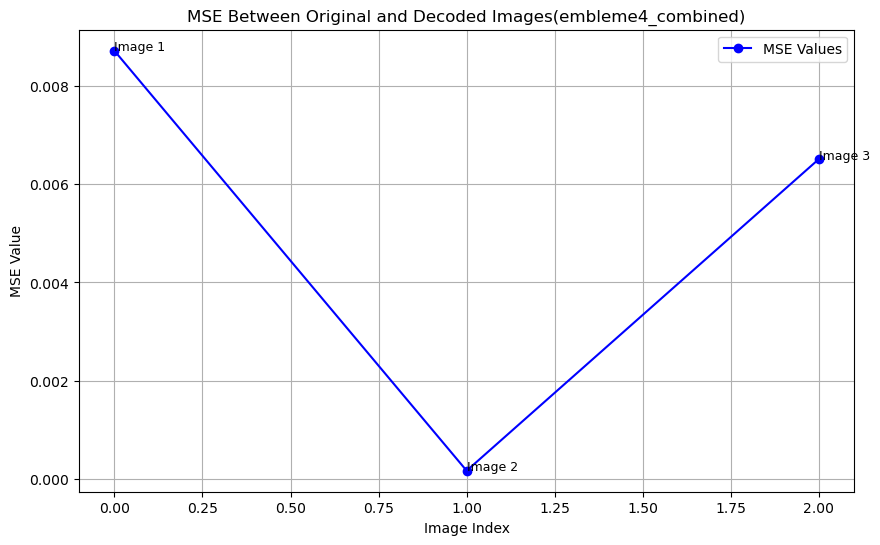

In [6]:
# Plotting the MSE values

plt.figure(figsize=(10, 6))

# Plot a continuous line
plt.plot(mse_values, marker='o', linestyle='-', color='b', label='MSE Values')

# Annotate each point with its image number
for i, value in enumerate(mse_values):
   plt.text(i, value, f"Image {i+1}", fontsize=9)

plt.title('MSE Between Original and Decoded Images(embleme4_combined)')
plt.xlabel('Image Index')
plt.ylabel('MSE Value')
plt.legend()  # This adds the legend to the plot
plt.grid(True)  # Adds a grid for easier visualization
plt.show()